### Maddie Bauer
#### DSC 640 
#### Exercise 1.2 - Charts

In [10]:
# load packages
library(readxl)
library(ggplot2)
library(tidyr)
library(magrittr)
library(dplyr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ tibble  3.0.4     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ magrittr::extract() masks tidyr::extract()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::set_names()  masks magrittr::set_names()


In [2]:
# load in datasets
df1 <- read_xlsx("hotdog-contest-winners.xlsm")
df2 <- read_excel("obama-approval-ratings.xls")

In [20]:
colnames(df1) <- c("Year", "Winner", "Dogs.Eaten", "Country", "New.Record")

In [21]:
# view df1
df1

Year,Winner,Dogs.Eaten,Country,New.Record
1980,Paul Siederman & Joe Baldini,9.10,United States,0
1981,Thomas DeBerry,11.00,United States,0
1982,Steven Abrams,11.00,United States,0
1983,Luis Llamas,19.50,Mexico,0
1984,Birgit Felden,9.50,Germany,0
1985,Oscar Rodriguez,11.75,United States,0
1986,Mark Heller,15.50,United States,0
1987,Don Wolfman,12.00,United States,0
1988,Jay Green,14.00,United States,0
1989,Jay Green,13.00,United States,0


In [4]:
# view df2
df2

Issue,Approve,Disapprove,None
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6
Situation in Iraq,41,53,6
Taxes,41,54,5
Healthcare Policy,40,57,3
Economy,38,59,3


# Bar Chart

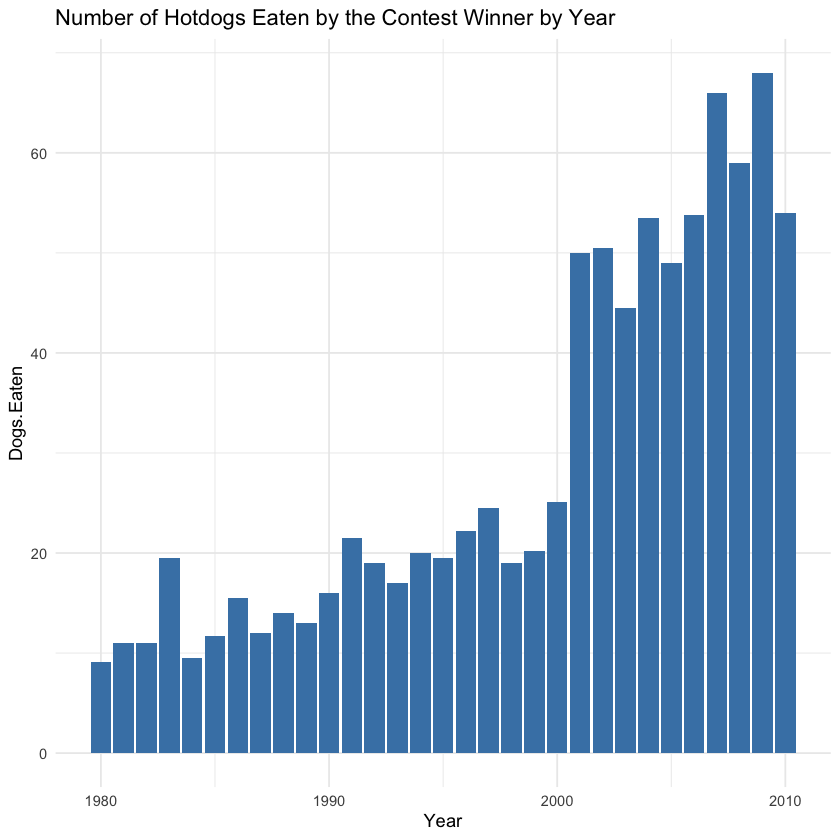

In [23]:
#Create bar chart
ggplot(df1, aes(x = Year, y = Dogs.Eaten)) +
  geom_bar(stat = "identity", fill = 'steelblue')+
  ggtitle("Number of Hotdogs Eaten by the Contest Winner by Year")+
  theme_minimal()

# Stacked Bar Chart

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: brewer
    train: function
    train_d

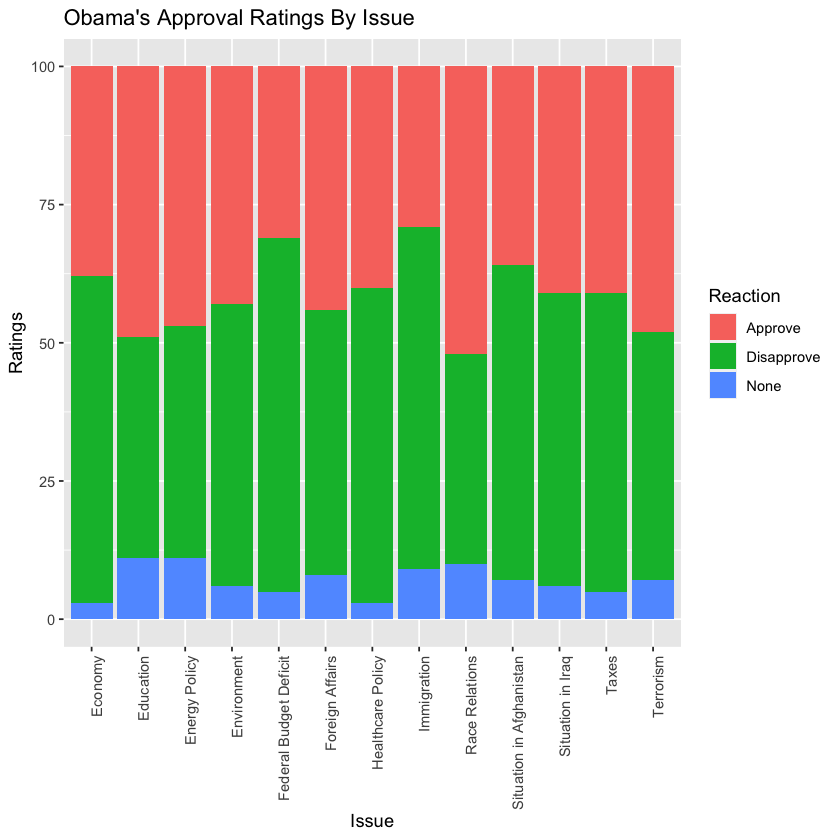

In [29]:
# Reshape data to long format for stacked bar chart
obama = df2 %>%
    tidyr::gather('Reaction','Ratings', Approve, Disapprove, None)

# Create Plot
ggplot2::ggplot(data = obama, ggplot2::aes(x = Issue, y = Ratings, fill = Reaction)) + 
    ggplot2:: geom_bar(stat='identity') + 
    ggplot2::theme(axis.text.x = element_text(angle = 90, hjust = 1)) + ggtitle("Obama's Approval Ratings By Issue")
    ggplot2::scale_fill_brewer(palette = 15)

# Pie Chart

In [45]:
# Reference: https://www.statmethods.net/graphs/pie.html

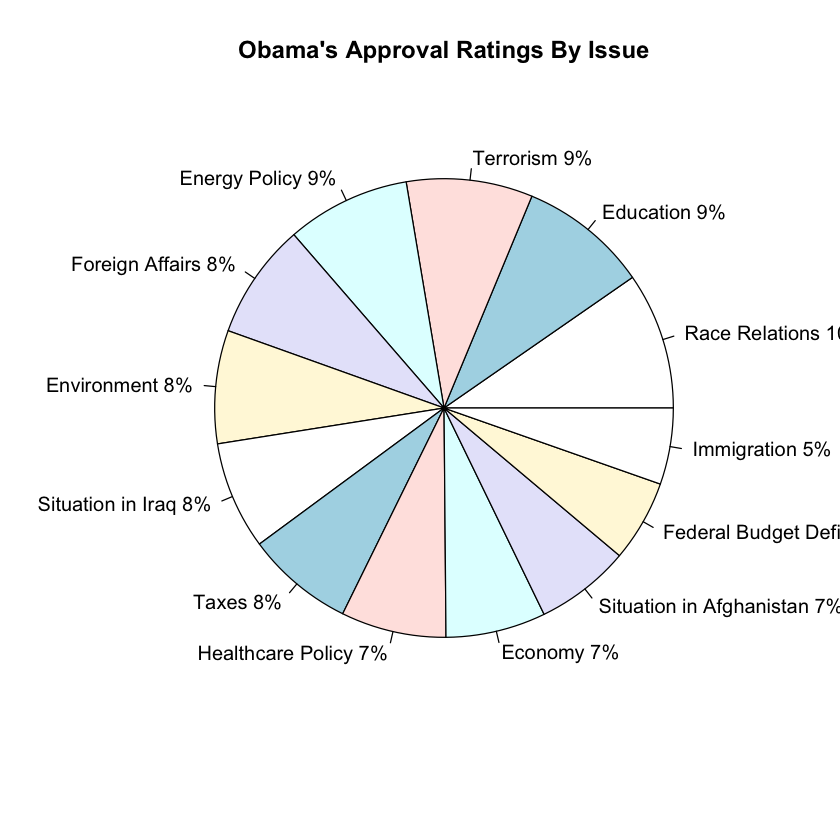

In [17]:
# Create data for the graph.
x <- df2$Approve
labels <- df2$Issue
pct <- round(x/sum(x)*100)
lbls <- paste(labels, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels

# Plot the chart.
pie(x, lbls, main = "Obama's Approval Ratings By Issue")




# Donut Chart

In [44]:
# Reference: https://stackoverflow.com/questions/49964329/ggplot-donut-chart-is-not-as-desired

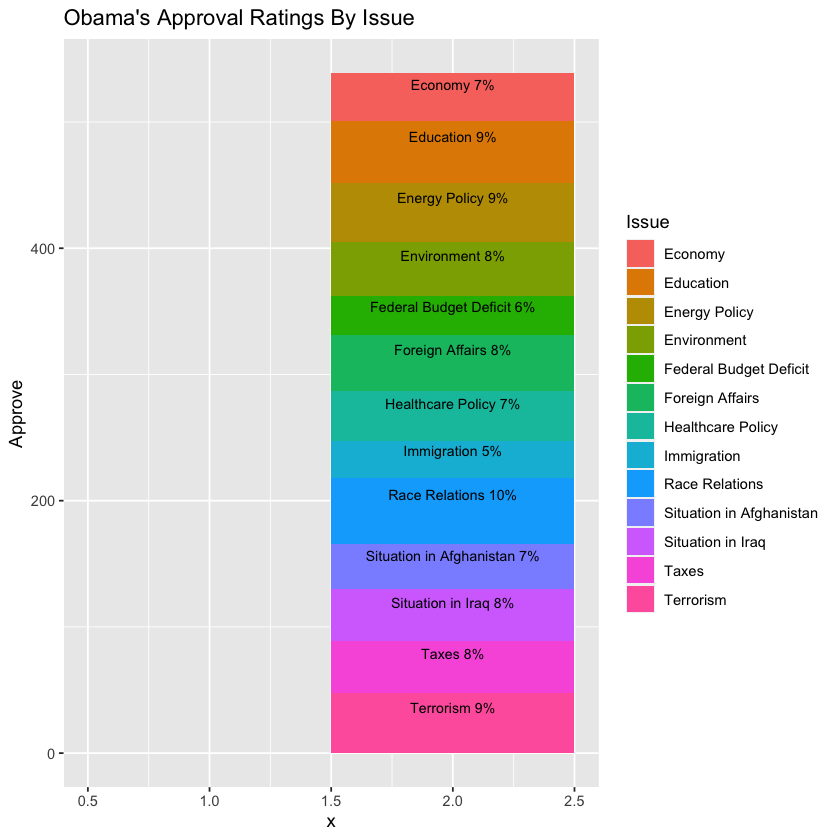

In [42]:
donut <- ggplot(df2, aes(x = 2, y = Approve, fill = Issue)) +
  geom_col(position = "stack", width = 1) +
  geom_text(aes(label = lbls), position = position_stack(vjust = 0.75), size = 3) +
  xlim(0.5, 2.5) +
  ggtitle("Obama's Approval Ratings By Issue")

donut

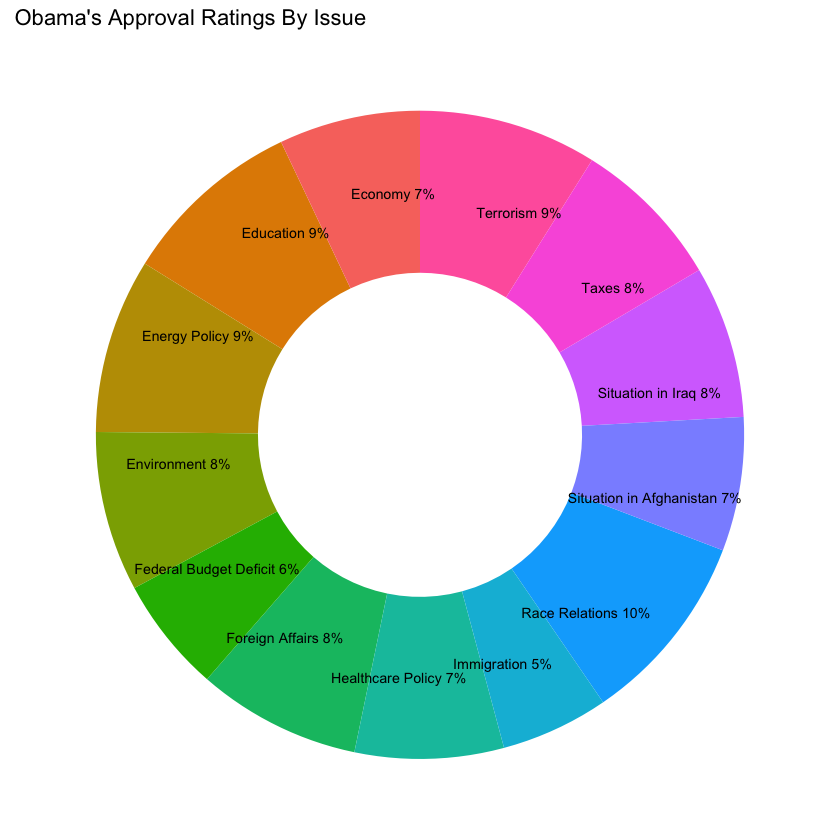

In [43]:
donut +
  coord_polar("y") +
  theme_void() +
  theme(legend.position='none')